In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [2]:
def mat_to_vec(matrix: np.ndarray) -> np.ndarray:
    return np.reshape(np.flipud(matrix), np.prod(matrix.shape))

def vec_to_mat(vector: np.ndarray, shape: tuple) -> np.ndarray:
    return np.flipud(np.reshape(vector, shape))

#### The image we are going to work with:

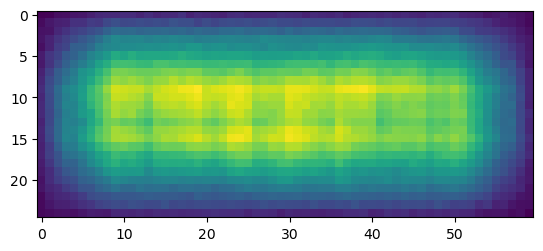

In [3]:
data = np.array(pd.read_hdf('image_data.hdf', key='/A'))
transform = np.array(pd.read_hdf('image_data.hdf', key='/C'))

plt.imshow(data)
plt.show()

Let's see how the transform $C$ changes images. For example, we will apply the transform to a checkered pattern:

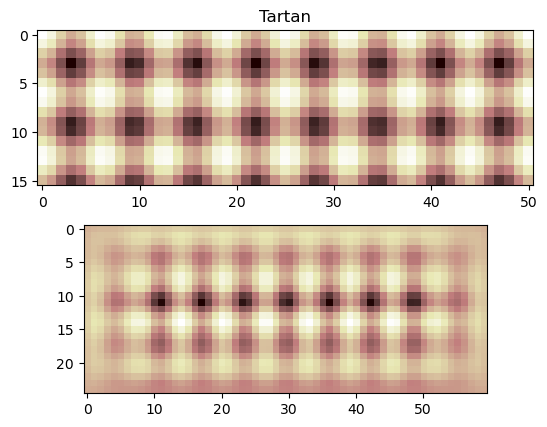

In [4]:
test_image = np.array([[np.cos(i) + np.cos(j) for j in range(51)] for i in range(16)])
transformed_image = vec_to_mat(transform @ mat_to_vec(test_image), (25, 60))

fig = plt.figure()
fig.add_subplot(2, 1, 1)
plt.imshow(test_image, cmap='pink')
plt.title("Tartan")
fig.add_subplot(2, 1, 2)
plt.imshow(transformed_image, cmap='pink')
plt.show()

Seems like $C$ expands and blurs the image, and the farther points are from the centre of the picture, the more they are distorted.

Let's then try a naive approach to restore the message hidden in the $A$: just find the pseudo-inverse of $C$ and apply it to $A$:

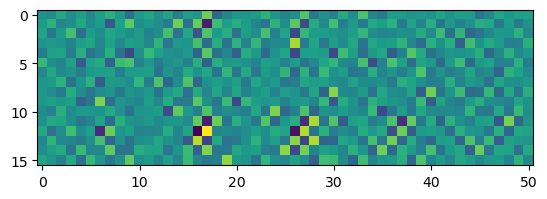

In [32]:
guess_0 = vec_to_mat(np.linalg.pinv(transform) @ mat_to_vec(data), (16, 51))
plt.imshow(guess_0)
plt.show()

The image is noticeably sharper, but it's impossible to read anything: the image is too noisy. We have to filter some noise using SVD and discarding some singular values:

In [41]:
u, s, vt = svds(transform, k=300)
print(f'U: {u.shape}, Σ: {s.shape}, V^T: {vt.shape}')
transform_improved = u @ np.diag(s) @ vt

U: (1500, 300), Σ: (300,), V^T: (300, 816)


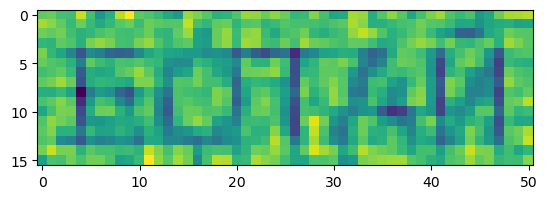

In [42]:
guess_improved = vec_to_mat(np.linalg.pinv(transform_improved) @ mat_to_vec(data), (16, 51))
plt.imshow(guess_improved)
plt.show()

Something in cyrillic. My KOI-7 decoder says it should read as "botaj":
```shell
~> echo "БОТАЙ" | iconv --to-code=koi-7
botaj
```
No idea what it should mean...